<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#특강-:-머신러닝/딥러닝-알고리즘-개요-&amp;-금융-모델링-Use-Case" data-toc-modified-id="특강-:-머신러닝/딥러닝-알고리즘-개요-&amp;-금융-모델링-Use-Case-1">특강 : 머신러닝/딥러닝 알고리즘 개요 &amp; 금융 모델링 Use Case</a></span><ul class="toc-item"><li><span><a href="#FDS(Fraud-Detection-System)-주요-이슈" data-toc-modified-id="FDS(Fraud-Detection-System)-주요-이슈-1.1">FDS(Fraud Detection System) 주요 이슈</a></span></li><li><span><a href="#Score-모형-개발" data-toc-modified-id="Score-모형-개발-1.2">Score 모형 개발</a></span><ul class="toc-item"><li><span><a href="#데이터-준비-:-데이터-샘플링" data-toc-modified-id="데이터-준비-:-데이터-샘플링-1.2.1">데이터 준비 : 데이터 샘플링</a></span></li><li><span><a href="#변수-선별-:-Feature-Selection" data-toc-modified-id="변수-선별-:-Feature-Selection-1.2.2">변수 선별 : Feature Selection</a></span></li><li><span><a href="#프로토타입-모형-개발-:-학습방법(알고리즘)-최적화" data-toc-modified-id="프로토타입-모형-개발-:-학습방법(알고리즘)-최적화-1.2.3">프로토타입 모형 개발 : 학습방법(알고리즘) 최적화</a></span></li><li><span><a href="#최종-모형-개발-:-최실비용-최소화-전략(모형-운영-방안-:-Cut-off-방안)" data-toc-modified-id="최종-모형-개발-:-최실비용-최소화-전략(모형-운영-방안-:-Cut-off-방안)-1.2.4">최종 모형 개발 : 최실비용 최소화 전략(모형 운영 방안 : Cut-off 방안)</a></span></li><li><span><a href="#전산-적용-:-C코드-변환-모듈-개발" data-toc-modified-id="전산-적용-:-C코드-변환-모듈-개발-1.2.5">전산 적용 : C코드 변환 모듈 개발</a></span></li></ul></li><li><span><a href="#Use-Case" data-toc-modified-id="Use-Case-1.3">Use Case</a></span><ul class="toc-item"><li><span><a href="#Import-Statements" data-toc-modified-id="Import-Statements-1.3.1">Import Statements</a></span></li><li><span><a href="#Import-and-Check-Data" data-toc-modified-id="Import-and-Check-Data-1.3.2">Import and Check Data</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1.3.3">Exploratory Data Analysis</a></span></li><li><span><a href="#Model-Setup:-Basic-Autoencoder" data-toc-modified-id="Model-Setup:-Basic-Autoencoder-1.3.4">Model Setup: Basic Autoencoder</a></span></li><li><span><a href="#Creating-The-Model" data-toc-modified-id="Creating-The-Model-1.3.5">Creating The Model</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-1.3.6">Model Evaluation</a></span></li></ul></li><li><span><a href="#머신러닝-알고리즘(Ensemble-&amp;-LSTM)" data-toc-modified-id="머신러닝-알고리즘(Ensemble-&amp;-LSTM)-1.4">머신러닝 알고리즘(Ensemble &amp; LSTM)</a></span><ul class="toc-item"><li><span><a href="#Ensemble" data-toc-modified-id="Ensemble-1.4.1">Ensemble</a></span></li><li><span><a href="#LSTM" data-toc-modified-id="LSTM-1.4.2">LSTM</a></span></li></ul></li></ul></li></ul></div>

## 특강 : 머신러닝/딥러닝 알고리즘 개요 & 금융 모델링 Use Case

- **강사 : 김광호 (서강대 졸업, VoicePrint)** -> 음성인식 관련
- **강의 주제 : 신용카드 사기(Fraud Detection) Use Case**

- \[참고] 신용 등급 평가 항목 : 나이, 우편번호(주소)/지역, 주택소유(부동산), 신용평가정보(KCB/나이스, 상환/부채/거래기간 등), 대출, ... 등

### FDS(Fraud Detection System) 주요 이슈

- Online Fraud 증가
- Score 모형(기존 모델) 정확도 : Rule-based(통계적) 모형 기반 -> 모형 개발과 실제 운영 간의 차이에 대응하기 위한 모형 업데이트 필요
- Cut-off 전략 : 높은 오탐지 비율
- 기존에 Rule에 없던, 이상 패턴을 자동으로 찾아서, 운영 비용과 손실 비용 최소화 필요

### Score 모형 개발

#### 데이터 준비 : 데이터 샘플링

- 대부부의 데이터가 정상 데이터 이므로, 불균형 데이터를 그대로 학습시, <br>
   과적합화가 발생하여 사기를 제대로 검출해내지 못해 손실 비용이 큼
- Major class(정상)을 잘못 예측하는 것보다, Minor class(비정상)을 잘못 예측하는 손실비용이 큼
- Balanced Sampling 방안 : Over Sampling(Minor class) vs. Under Sampling(Major class)을 적절한 비율로 적용
- Oversampling 기법 중 FDS 문제를 위해 **SMOTE**(Synthetic Minority Over-sampling Technique)를 이용하여 학습데이터를 추출 <br>
   -> 두개의 Minor class의 중간 지점에 임의의 데이트를 생성 (kNN 알고리즘 활용)  <br>
   -> 최근에는 DL 분야의 GNN 모델로 샘플링 하는 방법 사용

#### 변수 선별 : Feature Selection

- 과적합 방지, 정확도 개선, 학습효율화를 위해 변수 선별(Feature Selection) 작업 수행
- Frandom Forests 알고리즘을 이용, 변수 중요도를 산출한 후 전문가 협의를 통해 최종 변수를 결정<br>
   -> 알고리즘이 산출한 변수 중요도 순위 vs. 전문가가 검토한 중요도 순위 검토

#### 프로토타입 모형 개발 : 학습방법(알고리즘) 최적화

- Hyper prameter 최적화 : Input 수(feature selection 결과), Hidden Layer 및 Neuron 갯수, 활성화 함수, 안정성 기법(과적합 방지)
- 과적합 방지 : L1/L2 Normalization, Early Stoping, Dropout(hyper parameter 변경으로, 유사한 input data를 더 만드는 효과)

#### 최종 모형 개발 : 최실비용 최소화 전략(모형 운영 방안 : Cut-off 방안)

- FDS 알고리즘의 성능지표는 예측정확도 보다는 적중률(Hit Rate, 재현율)로 산정하는 것이 적절함

![accuracy_precision_recall](./images/accuracy_precision_recall.jpg)

![confusion_matrix](./images/confusion_matrix.png)

- FDS 비용을 고려한 학습 데이터 가중치 부여(예, 금액이 큰 데이터)
- 모형 검증 : 예측 데이터로 Stratified Random Sampling 하여 최종 Score 모형의 성능 안정성을 테스트

#### 전산 적용 : C코드 변환 모듈 개발

### Use Case

- 데이터 : Kaggle의 Credit Card Fraud Detection Competetion(https://www.kaggle.com/mlg-ulb/creditcardfraud)
- kernel 참고 : https://www.datascience.com/blog/fraud-detection-with-tensorflow (Author: David Ellison, PhD; Posted on August 9, 2018)

#### Import Statements

In [3]:
# import packages
# matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

#set random seed and percentage of test data
RANDOM_SEED = 314 #used to help randomly select the data points
TEST_PCT = 0.2 # 20% of the data

#set up graphic style in this case I am using the color scheme from xkcd.com
rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
LABELS = ["Normal","Fraud"]
col_list = ["cerulean","scarlet"]# https://xkcd.com/color/rgb/
sns.set(style='white', font_scale=1.75)  #, palette=sns.xkcd_palette(col_list)

#### Import and Check Data

In [4]:
df = pd.read_csv("creditcard.csv") #unzip and read in data downloaded to the local directory
df.head(n=5) #just to check you imported the dataset properly

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape #secondary check on the size of the dataframe

(284807, 31)

In [6]:
df.isnull().values.any() #check to see if any values are null, which there are not

False

In [7]:
pd.value_counts(df['Class'], sort = True) #class comparison 0=Normal 1=Fraud

0    284315
1       492
Name: Class, dtype: int64

#### Exploratory Data Analysis

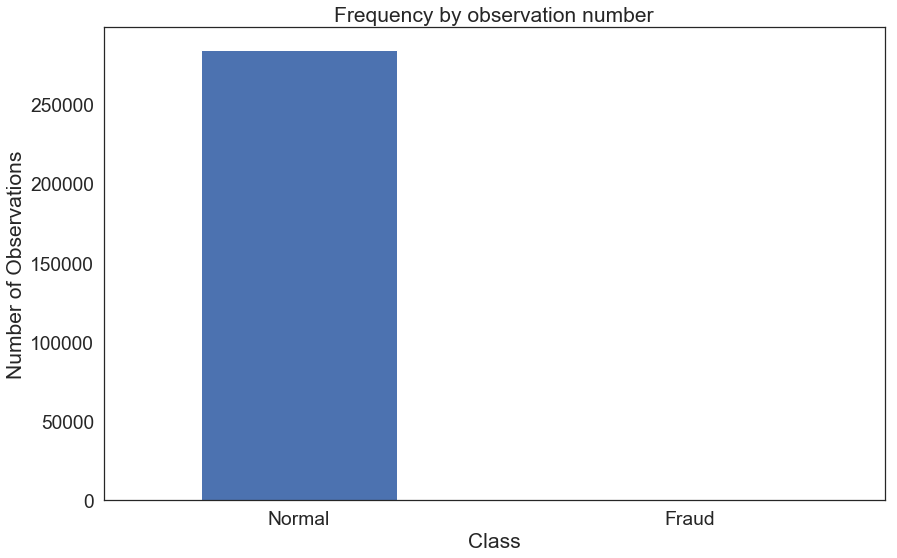

In [8]:
#if you don't have an intuitive sense of how imbalanced these two classes are, let's go visual
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [9]:
normal_df = df[df.Class == 0] #save normal_df observations into a separate df
fraud_df = df[df.Class == 1] #do the same for frauds

In [10]:
normal_df.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud_df.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

/Users/alex/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/alex/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


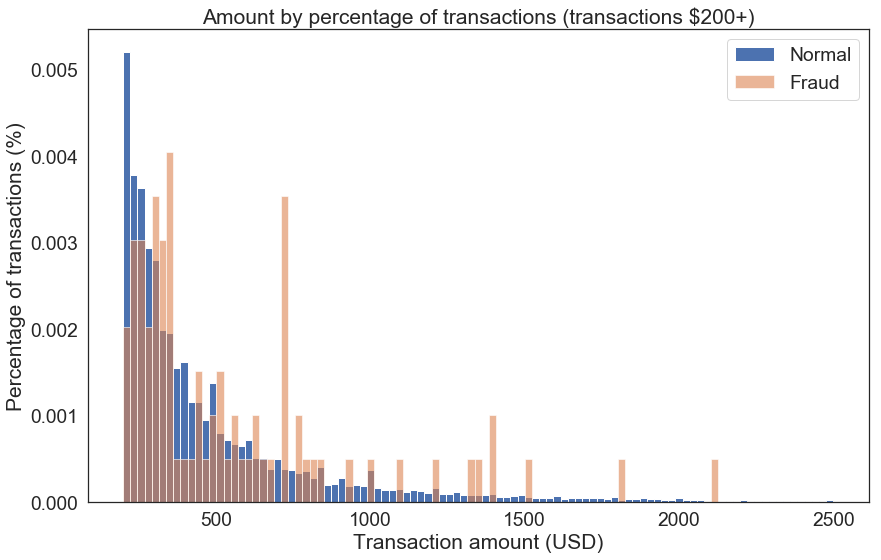

In [12]:
#plot of high value transactions
bins = np.linspace(200, 2500, 100)
plt.hist(normal_df.Amount, bins, alpha=1, normed=True, label='Normal')
plt.hist(fraud_df.Amount, bins, alpha=0.6, normed=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200+)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)");
plt.show()

/Users/alex/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/alex/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


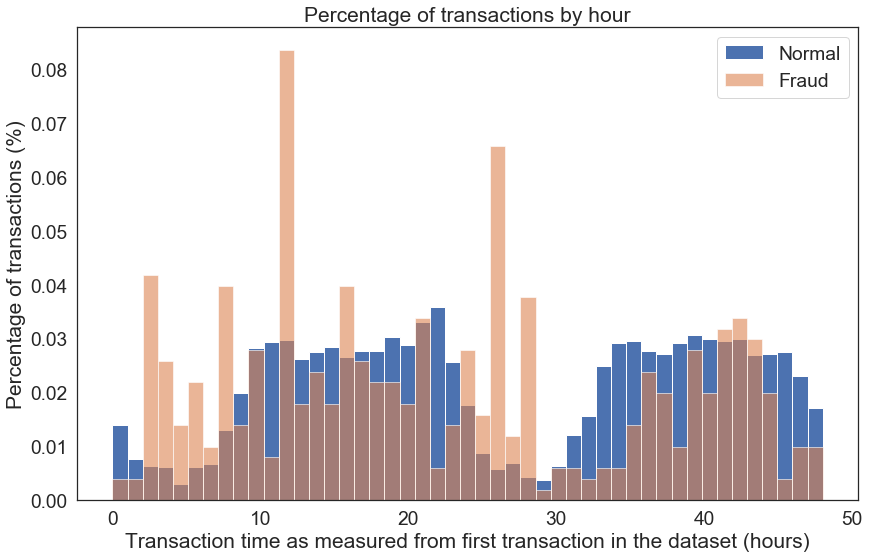

In [13]:
bins = np.linspace(0, 48, 48) #48 hours
plt.hist((normal_df.Time/(60*60)), bins, alpha=1, normed=True, label='Normal')
plt.hist((fraud_df.Time/(60*60)), bins, alpha=0.6, normed=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time as measured from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)");
#plt.hist((df.Time/(60*60)),bins)
plt.show()

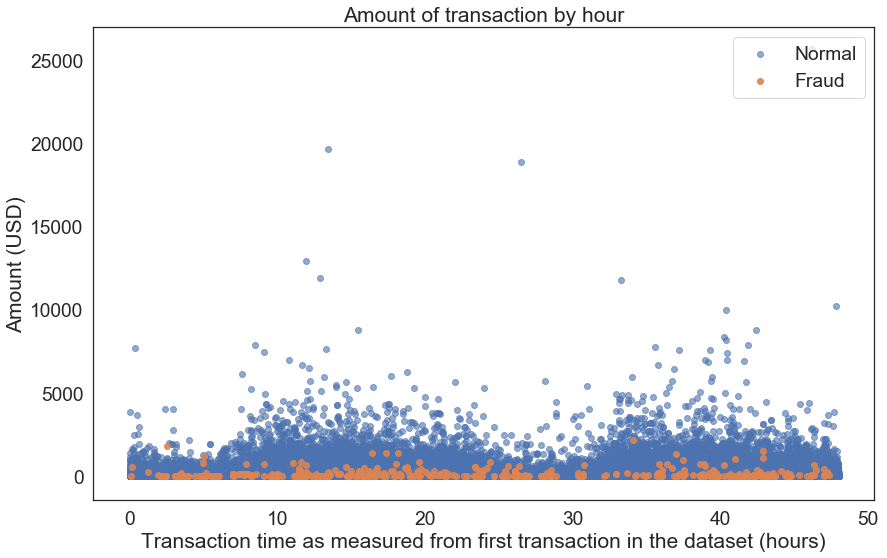

In [14]:
plt.scatter((normal_df.Time/(60*60)), normal_df.Amount, alpha=0.6, label='Normal')
plt.scatter((fraud_df.Time/(60*60)), fraud_df.Amount, alpha=0.9, label='Fraud')
plt.title("Amount of transaction by hour")
plt.xlabel("Transaction time as measured from first transaction in the dataset (hours)")
plt.ylabel('Amount (USD)')
plt.legend(loc='upper right')
plt.show()

#### Model Setup: Basic Autoencoder

In [15]:
# Normalize and Scale Data
#data = df.drop(['Time'], axis=1) #if you think the var is unimportant
df_norm = df
df_norm['Time'] = StandardScaler().fit_transform(df_norm['Time'].values.reshape(-1, 1))
df_norm['Amount'] = StandardScaler().fit_transform(df_norm['Amount'].values.reshape(-1, 1))

In [16]:
# Dividing Training and Test Set
train_x, test_x = train_test_split(df_norm, test_size=TEST_PCT, random_state=RANDOM_SEED)
train_x = train_x[train_x.Class == 0] #where normal transactions
train_x = train_x.drop(['Class'], axis=1) #drop the class column


test_y = test_x['Class'] #save the class column for the test set
test_x = test_x.drop(['Class'], axis=1) #drop the class column

train_x = train_x.values #transform to ndarray
test_x = test_x.values

In [17]:
train_x.shape

(227468, 30)

#### Creating The Model

In [18]:
# Autoencoder Layer Structure and Parameters
nb_epoch = 100
batch_size = 128
input_dim = train_x.shape[1] #num of columns, 30
encoding_dim = 14
hidden_dim = int(encoding_dim / 2) #i.e. 7
learning_rate = 1e-7

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
# Model Training and Logging
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history = autoencoder.fit(train_x, train_x,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_x, test_x),
                    verbose=1,
                    callbacks=[cp, tb]).history

Instructions for updating:
Use tf.cast instead.
Train on 227468 samples, validate on 56962 samples
Epoch 1/100
227468/227468 [==============================] - 3s 13us/step - loss: 0.8534 - acc: 0.4929 - val_loss: 0.8161 - val_acc: 0.5950
Epoch 2/100
227468/227468 [==============================] - 4s 17us/step - loss: 0.7623 - acc: 0.6158 - val_loss: 0.7826 - val_acc: 0.6301
Epoch 3/100
227468/227468 [==============================] - 3s 12us/step - loss: 0.7419 - acc: 0.6401 - val_loss: 0.7701 - val_acc: 0.6478
Epoch 4/100
227468/227468 [==============================] - 3s 12us/step - loss: 0.7328 - acc: 0.6537 - val_loss: 0.7634 - val_acc: 0.6665
Epoch 5/100
227468/227468 [==============================] - 3s 11us/step - loss: 0.7274 - acc: 0.6617 - val_loss: 0.7597 - val_acc: 0.6637
Epoch 6/100
227468/227468 [==============================] - 3s 11us/step - loss: 0.7238 - acc: 0.6671 - val_loss: 0.7553 - val_acc: 0.6700
Epoch 7/100
227468/227468 [==============================] - 

Epoch 57/100
227468/227468 [==============================] - 4s 16us/step - loss: 0.6942 - acc: 0.6929 - val_loss: 0.7313 - val_acc: 0.6894
Epoch 58/100
227468/227468 [==============================] - 3s 11us/step - loss: 0.6947 - acc: 0.6920 - val_loss: 0.7309 - val_acc: 0.6886
Epoch 59/100
227468/227468 [==============================] - 3s 12us/step - loss: 0.6942 - acc: 0.6922 - val_loss: 0.7316 - val_acc: 0.6907
Epoch 60/100
227468/227468 [==============================] - 3s 14us/step - loss: 0.6947 - acc: 0.6918 - val_loss: 0.7306 - val_acc: 0.6923
Epoch 61/100
227468/227468 [==============================] - 3s 14us/step - loss: 0.6941 - acc: 0.6927 - val_loss: 0.7298 - val_acc: 0.6900
Epoch 62/100
227468/227468 [==============================] - 2s 10us/step - loss: 0.6952 - acc: 0.6918 - val_loss: 0.7294 - val_acc: 0.6896
Epoch 63/100
227468/227468 [==============================] - 3s 12us/step - loss: 0.6942 - acc: 0.6930 - val_loss: 0.7294 - val_acc: 0.6903
Epoch 64/100


In [20]:
autoencoder = load_model('autoencoder_fraud.h5')

#### Model Evaluation

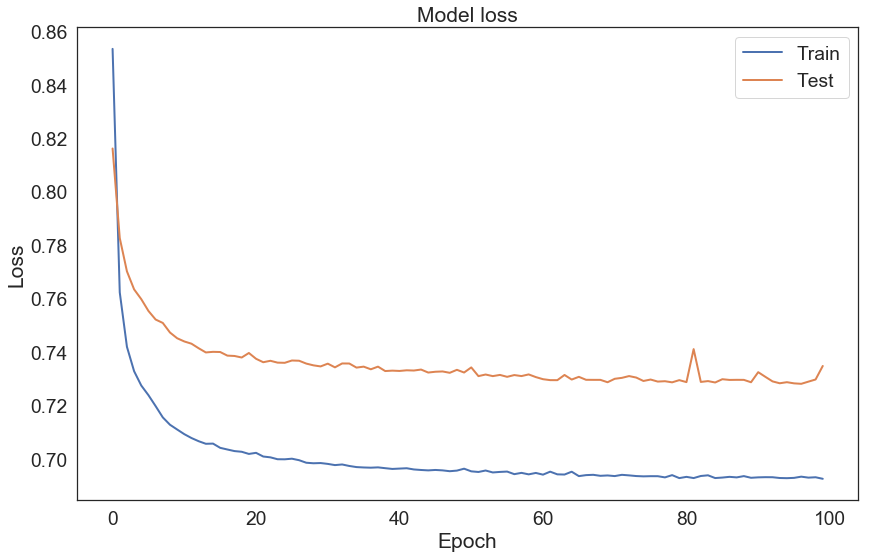

In [21]:
# Model Loss
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [22]:
# Reconstruction Error Check
test_x_predictions = autoencoder.predict(test_x)
mse = np.mean(np.power(test_x - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_y})
error_df.describe()

,Reconstruction_error,True_class
count,56962.000000,56962.000000
mean,0.727929,0.002019
std,3.153012,0.044887
min,0.047908,0.000000
25%,0.250721,0.000000
50%,0.391944,0.000000
75%,0.619343,0.000000
max,194.362385,1.000000


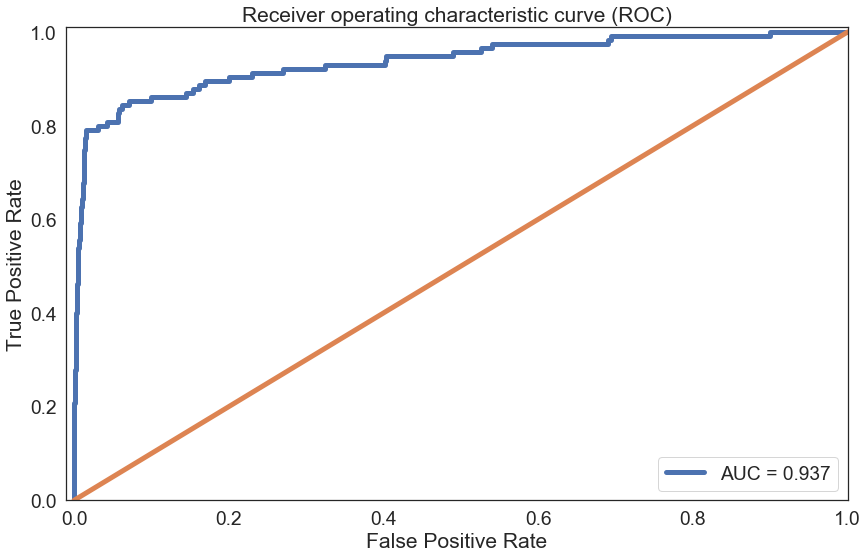

In [23]:
# ROC Curve Check
false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df.True_class, error_df.Reconstruction_error)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

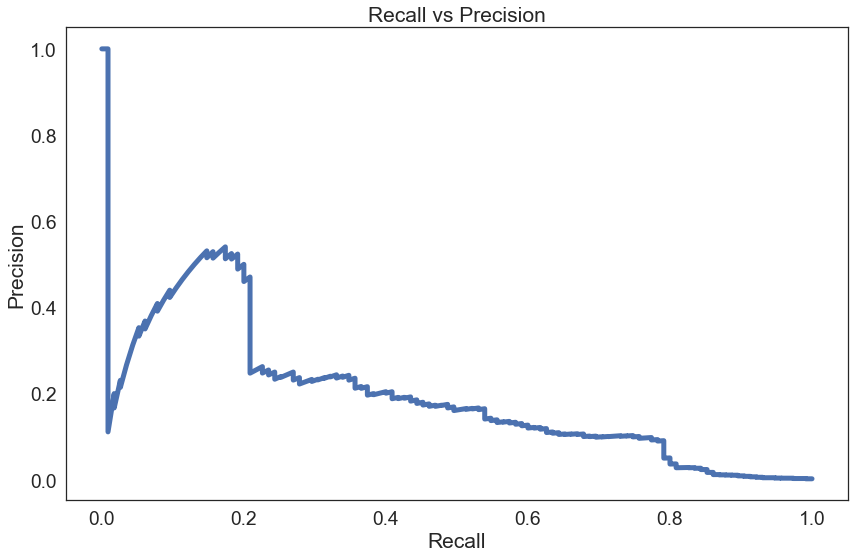

In [24]:
# Recall vs. Precision Thresholding
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(recall_rt, precision_rt, linewidth=5, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

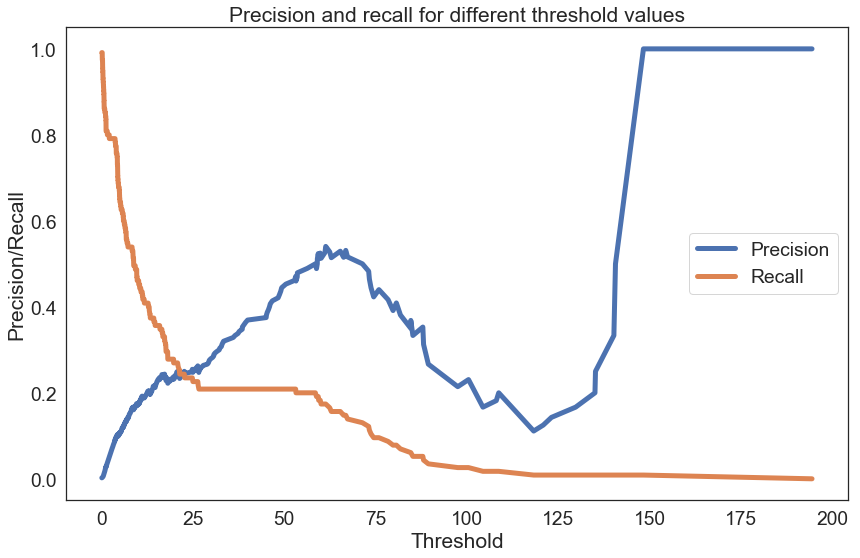

In [25]:
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

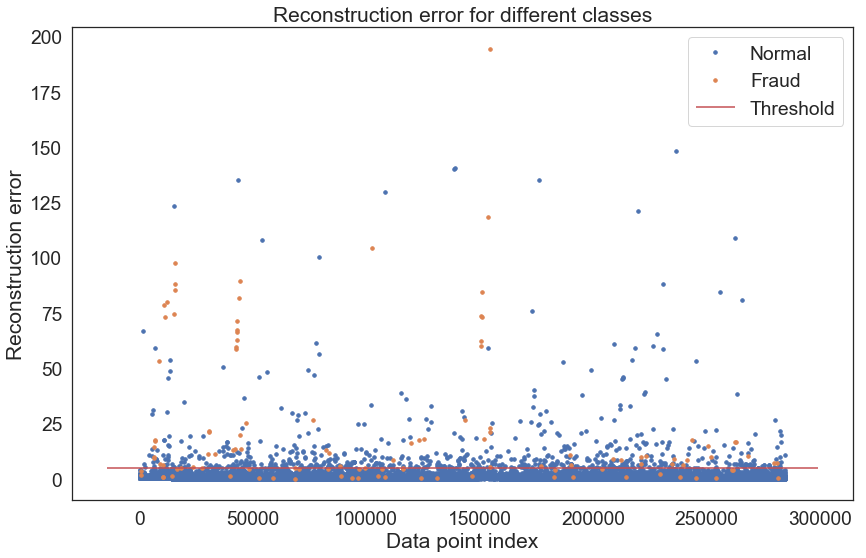

In [26]:
# Reconstruction Error vs Threshold Check
threshold_fixed = 5
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

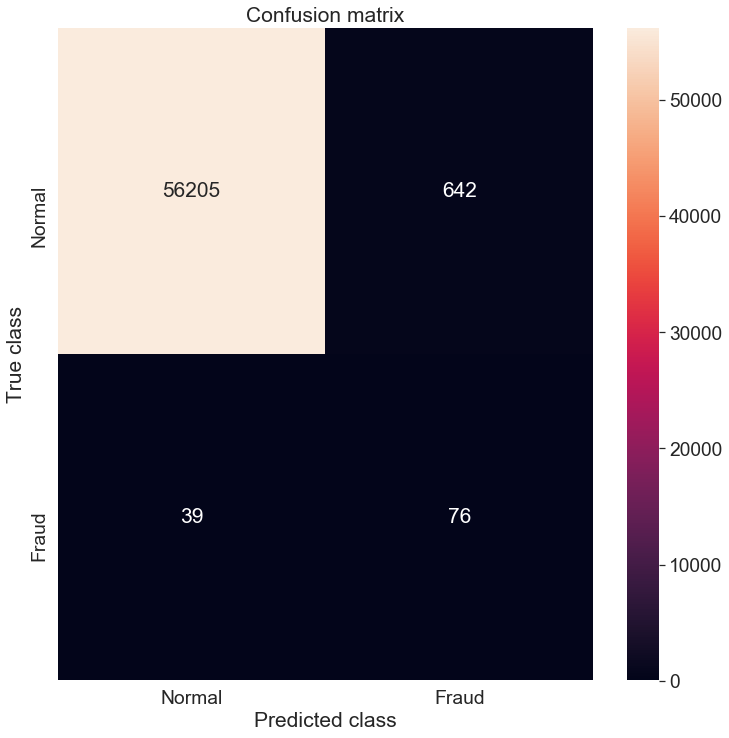

In [27]:
# Confusion Matrix
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### 머신러닝 알고리즘(Ensemble & LSTM)

#### Ensemble

- 앙상블 학습법(ensemble learning method)은 학습 알고리즘(learning algorithm)들을 하나 만 따로 쓰는 경우에 비해<br>
   더 좋은 예측 성능을 얻기위해 다수의 학습 알고리즘을 사용하는 방법이다
- 앙상블이란 여러개의 weak learners를 이용해 최적의 답을 찾아내는 기법이다.
    - Learner 란 특정한 데이터를 이용해 인스턴스화 한 모델을 말한다.
    - Weak learner 는 최종적인 결과물보다 상대적으로 정확하지 않은 결과를 보이는 learner 이다. 

- 배깅(Bootstrap AGGregatING, Bagging) 이란 테스트 데이터 샘플링(Bootstrap) 통해 여러개의 테스트 데이터를 만들고, <br>
   각 테스트 데이터를 이용해 여러개의 weak learner 를 만든다. 최종적으로 각 learner 의 예측결과를 평균내서 종합(aggregate)한다.

- 부스팅이란(Boosting) 이란 부스트래핑된 테스트 데이터로 여러개의 weak learner 들을 순차적으로(iterative) 만드는데, <br>
   i번째 learner 는 i-1 번째 learner 가 잘못 예측한 데이터에 가중치를 좀 더 주어서(boosting) 학습한다.<br>
   최종적으로 마지막에 생성된 learner 를 이용하여 예측한다.

#### LSTM

- LSTM(Long-Short Term Memory) 모델은 시간에 따른 변화정도를 유연하게 분석할 수 있으므로, <br>
   소득/연체 정보가 변함에 따라 유동적으로 변화하는 "시계열 데이터"인 개인의 신용 상태의 패턴 변화 분석에 용이
- 실제 적용을 위해서는, 산재한 데이터를 수집하여 cleansing 하는 과정에 많은 Resource가 소요됨